In [1]:
## import Library

import os
import pandas as pd
import numpy as np
import glob as gl
import zipfile as zp
import win32com
import win32com.client as win32
from datetime import datetime
import pandas as pd
import pyodbc 
import seaborn as sns
import matplotlib.pyplot as plt
print("Imports done")

Imports done


In [2]:
## reading the input file

Cric_IP_File="D:/Natarajan/Downloads/Insight Edge  - Master Data - Ind Vs Aus.xlsx"
print (Cric_IP_File)

Cric_df=pd.read_excel(Cric_IP_File)
print ("Cric_df created")

D:/Natarajan/Downloads/Insight Edge  - Master Data - Ind Vs Aus.xlsx
Cric_df created


# Level 1

In [7]:
## Level 1 A -> Which team scored the maximum runs ?
Teamscores = Cric_df.groupby('batting_team').sum().reset_index()
Teamscores = Teamscores [['batting_team','total_runs']]
Teamscores.rename(columns = {'batting_team':'Team', 'total_runs':'Runs'}, inplace = True)
Teamscores.head()


,Team,Runs
0,Australia,1992
1,India,1919


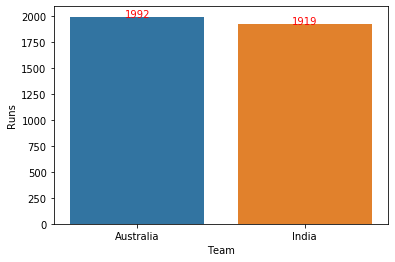

In [4]:
## Level 1 A -> Which team scored the maximum runs ? PLOT

ax = sns.barplot(x="Team", y="Runs", data=Teamscores)

for index, row in Teamscores.iterrows():
    ax.text(row.name,row.Runs, round(row.Runs,2), color='red', ha="center")
plt.show()


In [61]:
## Level 1 B -> Which batsman scored the maximum runs ?
Batscores = Cric_df.groupby('striker').sum().reset_index()
Batscores = Batscores [['striker','runs_off_bat']].sort_values(by='runs_off_bat',ascending=False).head(5).reset_index()
Batscores.rename(columns = {'striker':'Batsman', 'runs_off_bat':'Score'}, inplace = True) 
Batscores.head()

,index,Batsman,Score
0,8,M Labuschagne,426
1,24,SPD Smith,313
2,22,RR Pant,274
3,2,CA Pujara,271
4,0,AM Rahane,268


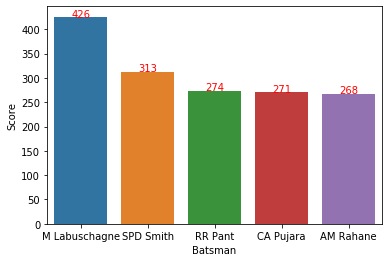

In [62]:
## Level 1 B -> Which player scored the maximum runs ? PLOT
bx = sns.barplot(x="Batsman", y="Score", data=Batscores)

for index, row in Batscores.iterrows():
    bx.text(row.name,row.Score, round(row.Score,2), color='red', ha="center")

plt.show()

In [63]:
## Level 1 C -> Which bowler took the maximum wicket ?
Cric_dff=Cric_df[Cric_df['wicket_type'].isin(["bowled","caught","caught and bowled","lbw"])] ## Filtering the data to get only wickets

Cric_dff['Wicket']=1 ## Adding new column 

Bowlwicket = Cric_dff.groupby('bowler').sum().reset_index()
Bowlwicket = Bowlwicket [['bowler','Wicket']].sort_values(by='Wicket',ascending=False).head(5).reset_index()
Bowlwicket.rename(columns = {'bowler':'Bowler', 'Wicket':'Wickets'}, inplace = True) 
Bowlwicket.head()


C:\Users\natarajan.maniva\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,Bowler,Wickets
0,6,PJ Cummins,21
1,1,JR Hazlewood,17
2,3,Mohammed Siraj,13
3,7,R Ashwin,12
4,0,JJ Bumrah,11


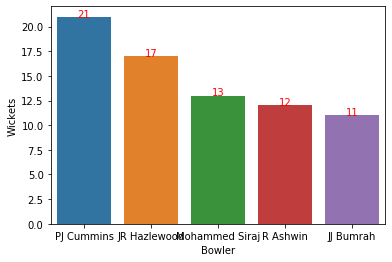

In [20]:
## Level 1 C -> Which bowler took the maximum wicket ? PLOT
cx = sns.barplot(x="Bowler", y="Wickets", data=Bowlwicket)

for index, row in Bowlwicket.iterrows():
    cx.text(row.name,row.Wickets, round(row.Wickets,2), color='red', ha="center")

plt.show()

In [64]:
## Level 1 D -> Which batsman scored the century

Batcent = Cric_df.groupby(['striker','test_no','team_innings'])['runs_off_bat'].sum().reset_index()

Batcent = Batcent[Batcent ['runs_off_bat']>100].reset_index()

Batcent.rename(columns = {'striker':'Batsman', 'runs_off_bat':'Scores'}, inplace = True) 
Batcent.head()
#Batcent.count()

,index,Batsman,test_no,team_innings,Scores
0,2,AM Rahane,2,1,112
1,52,M Labuschagne,4,1,108
2,119,SPD Smith,3,1,131


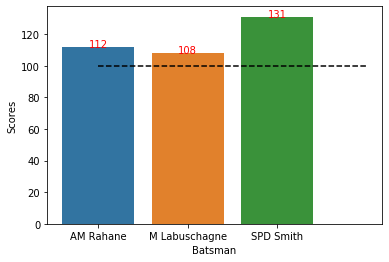

In [60]:
## Level 1 D -> Which batsman scored the century ? PLOT
dx = sns.barplot(x="Batsman", y="Scores", data=Batcent)
threshold = 100

for index, row in Batcent.iterrows():
    dx.text(row.name,row.Scores, round(row.Scores,2), color='red', ha="center")
    
dx.plot([0,3],[threshold, threshold], "k--")
plt.show()

In [65]:
## Level 1 E -> How many new balls used ?

Cric_df['new_ball'].count()



26

# Level 2

In [66]:
## Level 2 A -> Which batsman never lost his wicket

# first get the list of strikers
Notout_st=Cric_df[['striker']].reset_index().drop(['index'],axis=1)
Notout_st.rename(columns = {'striker':'Total_players'}, inplace = True) 
#Notout_st.head(5)

# second get the list of non strikers
Notout_nst=Cric_df[['non_striker']].reset_index().drop(['index'],axis=1)
Notout_nst.rename(columns = {'non_striker':'Total_players'}, inplace = True) 
#Notout_nst.head(5)

# third get the list of strikers and non strikers
Str_df=pd.concat([Notout_st, Notout_nst])
#Str_df.head()

# four get the list of batsman lost his wicket
Out_df=Cric_df[['player_dismissed']].dropna().reset_index(drop=True, inplace=False)
Out_df.rename(columns = {'player_dismissed':'Total_players'}, inplace = True) 
#Out_df.head()

# five (list of strikers and non strikers) minus (list of batsman lost his wicket)
Out_dff= Str_df.merge(Out_df, on=["Total_players"])
Notout_df= Str_df[~Str_df.Total_players.isin(Out_dff.Total_players)]
print(Notout_df.Total_players.unique())

['T Natarajan']


In [67]:
## Level 2 B -> Which bowler got the same batsman out maximum times

# filtering the data to get only wickets

Cric_dff=Cric_df[Cric_df['wicket_type'].isin(["bowled","caught","caught and bowled","lbw"])] 

# adding new column to count
Cric_dff['Wicket']=1 

# filtering for only required columns
BB_df=Cric_dff[['bowler','player_dismissed','Wicket']]

# summing to get the count of times player dismissed by a bowler
BB_dff=BB_df.groupby(['bowler','player_dismissed']).sum().sort_values(by='Wicket',ascending=False).head(5).reset_index()

print(BB_dff)


           bowler player_dismissed  Wicket
0      PJ Cummins        CA Pujara       5
1      PJ Cummins     Shubman Gill       3
2        R Ashwin        SPD Smith       3
3  Mohammed Siraj          C Green       2
4        MA Starc        AM Rahane       2


C:\Users\natarajan.maniva\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
## Level 2 C -> Which australian batsmen least runs in the series ?

# select the required columns
Ausscores = Cric_df[['batting_team','runs_off_bat','striker']]

# filter for only australia data
Ausscores = Ausscores[Ausscores['batting_team'].isin(['Australia'])]

# aggregate the runs for each batsmen and sort by asc 
Ausscores=Ausscores.groupby(['striker']).sum().sort_values(by='runs_off_bat',ascending=True).head(5).reset_index()
Ausscores.head(5)



,striker,runs_off_bat
0,JR Hazlewood,43
1,MS Harris,43
2,PJ Cummins,61
3,TM Head,62
4,JA Burns,63


In [7]:
## Level 2 D -> Which bowler bowled the least number of balls ?

# select the required columns
Bowlballs = Cric_df[['bowler','ball']]

# count the balls for each bolwer and sort by asc 
Bowlballs=Bowlballs.groupby(['bowler']).count().sort_values(by='ball',ascending=True).head(5).reset_index()
Bowlballs.head(10)


,bowler,ball
0,RG Sharma,1
1,M Labuschagne,67
2,Mohammed Shami,102
3,RA Jadeja,228
4,T Natarajan,238


In [15]:
## Level 2 E i -> no of wickets taken by the bowler ?
Cric_dff=Cric_df[Cric_df['wicket_type'].isin(["bowled","caught","caught and bowled","lbw"])]

Cric_dff['Wicket']=1  

Bowlwicket = Cric_dff.groupby('bowler').sum().reset_index()


Bowlwicket = Bowlwicket [['bowler','Wicket']].sort_values(by='Wicket',ascending=False).reset_index().drop(['index'],axis=1)
Bowlwicket.rename(columns = {'bowler':'Bowler','Wicket':'Wickets'}, inplace = True) 
Bowlwicket.head(15)


C:\Users\natarajan.maniva\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Bowler,Wickets
0,PJ Cummins,21
1,JR Hazlewood,17
2,Mohammed Siraj,13
3,R Ashwin,12
4,JJ Bumrah,11
5,MA Starc,11
6,NM Lyon,9
7,RA Jadeja,7
8,SN Thakur,7
9,NA Saini,4


In [14]:
## Level 2 E ii-> no of balls bowled by the bowler ?

# select the required columns
Bowlballs = Cric_df[['bowler','ball']]

# count the balls for each bolwer and sort by asc 
Bowlballs=Bowlballs.groupby(['bowler']).count().sort_values(by='ball',ascending=False).reset_index()
Bowlballs.rename(columns = {'bowler':'Bowler','ball':'Balls'}, inplace = True) 
Bowlballs.head(15)

,Bowler,Balls
0,NM Lyon,1122
1,PJ Cummins,980
2,JR Hazlewood,878
3,MA Starc,827
4,Mohammed Siraj,810
5,R Ashwin,805
6,JJ Bumrah,712
7,Washington Sundar,294
8,C Green,269
9,SN Thakur,260


In [27]:
##  Level 2 E ii-> merging both data sets to get the SR

BowlSR = pd.merge(Bowlballs, Bowlwicket,how='inner', on="Bowler")
BowlSR['SR']=BowlSR['Balls']/BowlSR['Wickets']
BowlSR=BowlSR[['Bowler','Balls','Wickets','SR']]
BowlSR.head(15).sort_values(by='SR',ascending=True)

,Bowler,Balls,Wickets,SR
12,RA Jadeja,228,7,32.571429
8,SN Thakur,260,7,37.142857
1,PJ Cummins,980,21,46.666667
2,JR Hazlewood,878,17,51.647059
10,UT Yadav,239,4,59.750000
4,Mohammed Siraj,810,13,62.307692
9,NA Saini,257,4,64.250000
6,JJ Bumrah,712,11,64.727273
5,R Ashwin,805,12,67.083333
7,Washington Sundar,294,4,73.500000


# Level 3 

In [ ]:
# partnership runs

In [3]:
Cric_df_part=Cric_df

In [4]:
Cric_df_part['str_nstr_Pair']=Cric_df_part['striker']+' - '+Cric_df_part['non_striker']
Cric_df_part['nstr_str_Pair']=Cric_df_part['non_striker']+' - '+Cric_df_part['striker']
Cric_df_part['Ball_cnt']=1
Cric_df_part.head(5)

,Venue,Date,test_no,day_no,session_no,match_innings,team_innings,ball,batting_team,bowling_team,...,penalty,wicket_type,player_dismissed,review_by,review_decision,new_ball,rain,str_nstr_Pair,nstr_str_Pair,Ball_cnt
0,Adelaide Oval,2020-12-17,1,1,1,1,1,0.1,India,Australia,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,PP Shaw - MA Agarwal,MA Agarwal - PP Shaw,1
1,Adelaide Oval,2020-12-17,1,1,1,1,1,0.2,India,Australia,...,NaN,bowled,PP Shaw,NaN,NaN,NaN,NaN,PP Shaw - MA Agarwal,MA Agarwal - PP Shaw,1
2,Adelaide Oval,2020-12-17,1,1,1,1,1,0.3,India,Australia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA Pujara - MA Agarwal,MA Agarwal - CA Pujara,1
3,Adelaide Oval,2020-12-17,1,1,1,1,1,0.4,India,Australia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA Pujara - MA Agarwal,MA Agarwal - CA Pujara,1
4,Adelaide Oval,2020-12-17,1,1,1,1,1,0.5,India,Australia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MA Agarwal - CA Pujara,CA Pujara - MA Agarwal,1


In [5]:
Cric_df_part1=Cric_df_part[['test_no','team_innings','total_runs','str_nstr_Pair','batting_team']]
Cric_df_part1.head(5)

,test_no,team_innings,total_runs,str_nstr_Pair,batting_team
0,1,1,0,PP Shaw - MA Agarwal,India
1,1,1,0,PP Shaw - MA Agarwal,India
2,1,1,0,CA Pujara - MA Agarwal,India
3,1,1,1,CA Pujara - MA Agarwal,India
4,1,1,0,MA Agarwal - CA Pujara,India


In [6]:
Cric_df_part2=Cric_df_part[['test_no','team_innings','total_runs','nstr_str_Pair','batting_team']]
Cric_df_part2.head(5)

,test_no,team_innings,total_runs,nstr_str_Pair,batting_team
0,1,1,0,MA Agarwal - PP Shaw,India
1,1,1,0,MA Agarwal - PP Shaw,India
2,1,1,0,MA Agarwal - CA Pujara,India
3,1,1,1,MA Agarwal - CA Pujara,India
4,1,1,0,CA Pujara - MA Agarwal,India


In [7]:
# str- nstr comb
Cric_df_partst=Cric_df_part1.groupby(['test_no','team_innings','str_nstr_Pair','batting_team']).sum().sort_values(by=['total_runs'],ascending=False).reset_index()
Cric_df_partst.rename(columns = {'str_nstr_Pair':'Pair'}, inplace = True)
Cric_df_partst.head(5)

,test_no,team_innings,Pair,batting_team,total_runs
0,3,2,RR Pant - CA Pujara,India,102
1,4,2,Shubman Gill - CA Pujara,India,84
2,4,1,SN Thakur - Washington Sundar,India,75
3,2,1,AM Rahane - RA Jadeja,India,67
4,4,1,M Labuschagne - MS Wade,Australia,67


In [8]:
# nstr- str comb
Cric_df_partnst=Cric_df_part2.groupby(['test_no','team_innings','nstr_str_Pair','batting_team']).sum().sort_values(by=['total_runs'],ascending=False).reset_index()
Cric_df_partnst.rename(columns = {'nstr_str_Pair':'Pair'}, inplace = True) 
Cric_df_partnst.head(5)

,test_no,team_innings,Pair,batting_team,total_runs
0,3,2,CA Pujara - RR Pant,India,102
1,4,2,CA Pujara - Shubman Gill,India,84
2,4,1,Washington Sundar - SN Thakur,India,75
3,4,1,MS Wade - M Labuschagne,Australia,67
4,2,1,RA Jadeja - AM Rahane,India,67


In [14]:
# partnership runs
Cric_df_part3=pd.merge(Cric_df_partst,Cric_df_partnst,how="inner", on=['test_no','team_innings','Pair','batting_team']).set_index(['test_no','team_innings','Pair','batting_team']).sum(axis=1).reset_index()
Cric_df_part3.rename(columns = {0:'Partnership_Runs'}, inplace = True) 
#Cric_df_part3.head(25)
Cric_df_part3.to_excel("D:/Natarajan/Downloads/Part_runs.xlsx") 


In [ ]:
#partnership balls

In [73]:
Cric_df_ballfaced=Cric_df

In [74]:
Cric_df_ballfaced['str_nstr_Pair']=Cric_df_ballfaced['striker']+' - '+Cric_df_ballfaced['non_striker']
Cric_df_ballfaced['nstr_str_Pair']=Cric_df_ballfaced['non_striker']+' - '+Cric_df_ballfaced['striker']
Cric_df_ballfaced['Ball_cnt']=1
Cric_df_ballfaced.head()

,Venue,Date,test_no,day_no,session_no,match_innings,team_innings,ball,batting_team,bowling_team,...,penalty,wicket_type,player_dismissed,review_by,review_decision,new_ball,rain,str_nstr_Pair,nstr_str_Pair,Ball_cnt
0,Adelaide Oval,2020-12-17,1,1,1,1,1,0.1,India,Australia,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,PP Shaw - MA Agarwal,MA Agarwal - PP Shaw,1
1,Adelaide Oval,2020-12-17,1,1,1,1,1,0.2,India,Australia,...,NaN,bowled,PP Shaw,NaN,NaN,NaN,NaN,PP Shaw - MA Agarwal,MA Agarwal - PP Shaw,1
2,Adelaide Oval,2020-12-17,1,1,1,1,1,0.3,India,Australia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA Pujara - MA Agarwal,MA Agarwal - CA Pujara,1
3,Adelaide Oval,2020-12-17,1,1,1,1,1,0.4,India,Australia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA Pujara - MA Agarwal,MA Agarwal - CA Pujara,1
4,Adelaide Oval,2020-12-17,1,1,1,1,1,0.5,India,Australia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MA Agarwal - CA Pujara,CA Pujara - MA Agarwal,1


In [75]:
Cric_df_ballfaced_1=Cric_df_ballfaced[['test_no','team_innings','Ball_cnt','str_nstr_Pair','batting_team']]
Cric_df_ballfaced_1.head(5)

,test_no,team_innings,Ball_cnt,str_nstr_Pair,batting_team
0,1,1,1,PP Shaw - MA Agarwal,India
1,1,1,1,PP Shaw - MA Agarwal,India
2,1,1,1,CA Pujara - MA Agarwal,India
3,1,1,1,CA Pujara - MA Agarwal,India
4,1,1,1,MA Agarwal - CA Pujara,India


In [76]:
Cric_df_ballfaced_2=Cric_df_ballfaced[['test_no','team_innings','Ball_cnt','nstr_str_Pair','batting_team']]
Cric_df_ballfaced_2.head(5)

,test_no,team_innings,Ball_cnt,nstr_str_Pair,batting_team
0,1,1,1,MA Agarwal - PP Shaw,India
1,1,1,1,MA Agarwal - PP Shaw,India
2,1,1,1,MA Agarwal - CA Pujara,India
3,1,1,1,MA Agarwal - CA Pujara,India
4,1,1,1,CA Pujara - MA Agarwal,India


In [77]:
Cric_df_ballst=Cric_df_ballfaced_1.groupby(['test_no','team_innings','str_nstr_Pair','batting_team']).sum().sort_values(by=['Ball_cnt'],ascending=False).reset_index()
Cric_df_ballst.rename(columns = {'str_nstr_Pair':'Pair'}, inplace = True)
Cric_df_ballst.head(5)

,test_no,team_innings,Pair,batting_team,Ball_cnt
0,3,2,CA Pujara - RR Pant,India,147
1,2,1,RA Jadeja - AM Rahane,India,132
2,3,2,GH Vihari - R Ashwin,India,131
3,3,2,R Ashwin - GH Vihari,India,128
4,4,2,CA Pujara - Shubman Gill,India,123


In [78]:
Cric_df_ballnst=Cric_df_ballfaced_2.groupby(['test_no','team_innings','nstr_str_Pair','batting_team']).sum().sort_values(by=['Ball_cnt'],ascending=False).reset_index()
Cric_df_ballnst.rename(columns = {'nstr_str_Pair':'Pair'}, inplace = True) 
Cric_df_ballnst.head(5)

,test_no,team_innings,Pair,batting_team,Ball_cnt
0,3,2,RR Pant - CA Pujara,India,147
1,2,1,AM Rahane - RA Jadeja,India,132
2,3,2,R Ashwin - GH Vihari,India,131
3,3,2,GH Vihari - R Ashwin,India,128
4,4,2,Shubman Gill - CA Pujara,India,123


In [86]:
#pd.merge(df1, df2, on=['id', 'name']).set_index(['id', 'name']).sum(axis=1)
Cric_df_ballfaced_3=pd.merge(Cric_df_ballst,Cric_df_ballnst,how="inner", on=['test_no','team_innings','Pair','batting_team']).set_index(['test_no','team_innings','Pair','batting_team']).sum(axis=1).reset_index()
Cric_df_ballfaced_3.rename(columns = {0:'Balls_faced'}, inplace = True) 
Cric_df_ballfaced_3=Cric_df_ballfaced_3[Cric_df_ballfaced_3['Balls_faced']>=100]
Cric_df_ballfaced_3.to_excel("D:/Natarajan/Downloads/Ballsfaced.xlsx") 

In [19]:
# balls faced by each team
#Cric_df.groupby(['batting_team']).sum().sort_values(by=['Ball_cnt'],ascending=False).reset_index()

#Cric_df_Bat_ball=Cric_df[['test_no','striker','Ball_cnt']]
#Cric_df_Bat_ball.groupby(['test_no','striker']).sum().sort_values(by=['Ball_cnt'],ascending=False).reset_index().head(20)


,test_no,striker,Ball_cnt
0,3,SPD Smith,393
1,3,CA Pujara,382
2,3,M Labuschagne,314
3,4,CA Pujara,305
4,2,AM Rahane,263
5,4,M Labuschagne,226
6,2,C Green,207
7,3,GH Vihari,200
8,4,C Green,198
9,1,V Kohli,188


In [30]:
Cric_df_balls_team=Cric_df[['test_no','team_innings','match_innings','batting_team','Ball_cnt','total_runs']]
Cric_df_balls_team1=Cric_df_balls_team.groupby(['test_no','team_innings','match_innings','batting_team']).sum().sort_values(by=['test_no','team_innings','Ball_cnt','total_runs'],ascending=False).reset_index()
Cric_df_balls_team1['R/B']=Cric_df_balls_team1['total_runs']/Cric_df_balls_team1['Ball_cnt']
Cric_df_balls_team1.sort_values(by=['test_no','team_innings','match_innings','Ball_cnt','total_runs'],ascending=False).head(20)


,test_no,team_innings,match_innings,batting_team,Ball_cnt,total_runs,R/B
0,4,2,4,India,585,329,0.562393
1,4,2,3,Australia,461,294,0.637744
3,4,1,2,India,672,336,0.500000
2,4,1,1,Australia,699,369,0.527897
4,3,2,4,India,794,334,0.420655
5,3,2,3,Australia,525,312,0.594286
7,3,1,2,India,607,244,0.401977
6,3,1,1,Australia,640,338,0.528125
9,2,2,4,India,95,70,0.736842
8,2,2,3,Australia,622,200,0.321543


In [ ]:
# review stats

In [49]:
Cric_Review=Cric_df
#Cric_Review.drop(Cric_Review.index, inplace=True)

In [54]:
Cric_Review=Cric_Review[['test_no','batting_team','bowling_team','player_dismissed','review_by','review_decision']]
Cric_Review=Cric_Review[Cric_Review['review_by'].isin(['Australia','India'])].reset_index()
Cric_Review=Cric_Review.drop(['index'],axis=1)


In [56]:
Cric_Review.head(60)
Cric_Review.to_excel("D:/Natarajan/Downloads/Review.xlsx") 

In [ ]:
Cric_Review['Review_Scores']

In [98]:
Cric_IP_File1="D:/Natarajan/Downloads/Insight Edge  - Master Data - Ind Vs Aus.xlsx"
print (Cric_IP_File)

Cric_df_w=pd.read_excel(Cric_IP_File1)
print ("Cric_df created")

D:/Natarajan/Downloads/Insight Edge  - Master Data - Ind Vs Aus.xlsx
Cric_df created


In [102]:
Cric_df_w['Ball_cnt']=1
Cric_df_w=Cric_df_w[['batting_team','Wickets','Ball_cnt','total_runs']]
Cric_df_w1=Cric_df_w.groupby(['batting_team','Wickets']).sum().sort_values(by=['Ball_cnt','total_runs'],ascending=False).reset_index()
Cric_df_w1.to_excel("D:/Natarajan/Downloads/Wicket_Runs.xlsx") 

In [ ]:
# Session summary

In [11]:
Cric_Session=Cric_df
##  Adding wickets sum column
Cric_Session.loc[Cric_Session['player_dismissed'].isnull(),'Wicket_Cnt'] = 0 
Cric_Session.loc[Cric_Session['player_dismissed'].notnull(),'Wicket_Cnt'] = 1 

In [12]:
## Session summary table
Cric_Session=Cric_Session[['test_no','day_no','session_no','match_innings','batting_team','bowling_team','total_runs','player_dismissed','Wicket_Cnt']]
Cric_Session['Ball_cnt']=1
Cric_Session_Rolled=Cric_Session.groupby(['test_no','day_no','session_no','match_innings','batting_team','bowling_team']).sum().reset_index()
Cric_Session_Rolled['Runs/Wicket']=Cric_Session_Rolled['total_runs']/Cric_Session_Rolled['Wicket_Cnt']
Cric_Session_Rolled.loc[Cric_Session_Rolled['Ball_cnt']>=90,'Ball_Filter'] = 1
Cric_Session_Rolled.loc[Cric_Session_Rolled['Ball_cnt']<90,'Ball_Filter'] = 0 

#Download
#Cric_Session_Rolled.to_excel("D:/Natarajan/Downloads/Session_info.xlsx") 
#Cric_Session_Rolled.head(10)

C:\Users\natarajan.maniva\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
Perf_session=Cric_df
Perf_session['Ball_cnt']=1
Perf_session.loc[Perf_session['player_dismissed'].isnull(),'Wicket_Cnt'] = 0 
Perf_session.loc[Perf_session['player_dismissed'].notnull(),'Wicket_Cnt'] = 1 

In [18]:
Perf_session=Perf_session[['test_no','day_no','session_no','total_runs','Ball_cnt','Wicket_Cnt']]

In [20]:
Perf_session_Analysis=Perf_session.groupby(['test_no','day_no','session_no']).sum().reset_index()
Perf_session_Analysis.to_excel("D:/Natarajan/Downloads/Session_updates.xlsx") 